1. names 데이터를 로딩해 하나의 데이터로 concat
2. 성별, 년도별로 그룹핑하여 sum하고 이를 plotting하시오
3. 데이터 info를 확인하시오
4. births로 sorting하시오
5. row를 'year', col을 'name'으로 하여 pivot table 생성
6. 위의 피벗 테이블에서 'john', 'harry', 'marry', 'marilyn' 필드를 취한 다음 plotting할 것
7. 2010년도에 태어난 boys들만 indexing
8. 아동 이름의 변화 추세를 알아보기 위해
    - 아동 이름으로부터 마지막 문자를 취해 저장
    - row는 마지막 문자, cols는 'sex', 'year'로 pivot_table을 생성
    - 위의 pivot_table에서 columns를 1910, 1960, 2010년만 취해 reindex하시오
    - 위 결과와 sex별, year별 합계를 구하시오
    - 남녀로 구반하여 가로는 알파벳, 세로는 prop로 plotting하시오(2장)
    - 년도별로 d, n, y로 끝나는 이름의 비율을 출력

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## names 데이터를 로딩해 하나의 데이터로 concat

In [2]:
names1880 = pd.read_csv('names/yob1880.txt', names = ['name', 'sex', 'births'])
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [3]:
len(names1880)

2000

In [8]:
pieces = []

for a in range(1880, 2011):
    path = 'names/yob%d.txt' % a
    frame = pd.read_csv(path, names = ['name', 'sex', 'births'])
    frame['year'] = a # frame dataframe에 year라는 새로운 속성을 생성
    pieces.append(frame) # pieces에 frame(1880 ~ 2010까지 있음) 넣기
    # pieces[1]은 1880년 데이터, pieces[130]은 2010년 데이터

In [9]:
print type(pieces)
print len(pieces)

<type 'list'>
131


In [10]:
print pieces[130].head()

       name sex  births  year
0  Isabella   F   22731  2010
1    Sophia   F   20477  2010
2      Emma   F   17179  2010
3    Olivia   F   16860  2010
4       Ava   F   15300  2010


In [11]:
# list형태인 pieces를 dataframe으로 변경
names = pd.concat(pieces, ignore_index = True)
print names.head()
print names.tail()

        name sex  births  year
0       Mary   F    7065  1880
1       Anna   F    2604  1880
2       Emma   F    2003  1880
3  Elizabeth   F    1939  1880
4     Minnie   F    1746  1880
              name sex  births  year
1690779    Zymaire   M       5  2010
1690780     Zyonne   M       5  2010
1690781  Zyquarius   M       5  2010
1690782      Zyran   M       5  2010
1690783      Zzyzx   M       5  2010


## 성별, 년도별로 그룹핑하여 sum하고 이를 plotting하시오

In [12]:
# 아래처럼 하면 F, M이 따로 나와 보기가 힘들다
#names.groupby(['sex', 'year']).births.sum()
#names.groupby(['sex', 'year']).agg(np.mean)

total_births = names.pivot_table('births', index = 'year', columns = 'sex', aggfunc = sum)
print total_births.head()
print total_births.tail()

sex        F       M
year                
1880   90993  110493
1881   91955  100748
1882  107851  113687
1883  112322  104632
1884  129021  114445
sex         F        M
year                  
2006  1896468  2050234
2007  1916888  2069242
2008  1883645  2032310
2009  1827643  1973359
2010  1759010  1898382


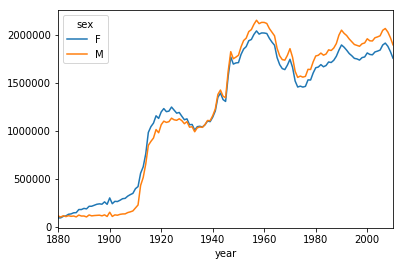

In [25]:
#plt.plot(total_births)
total_births.plot()

## 데이터 info를 확인하시오

In [14]:
total_births.info()
total_births.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Data columns (total 2 columns):
F    131 non-null int64
M    131 non-null int64
dtypes: int64(2)
memory usage: 3.1 KB


sex,F,M
count,131.000000,131.000000
mean,1221298.778626,1239790.740458
std,646001.337934,740107.858262
min,90993.000000,100748.000000
25%,591128.000000,471204.000000
50%,1394891.000000,1426400.000000
75%,1768764.500000,1900241.000000
max,2043983.000000,2155427.000000


## births로 sorting하시오

In [15]:
sort_by_births = names.sort_values(by = 'births', ascending = False)
print sort_by_births.head()
print sort_by_births.tail()

           name sex  births  year
431022    Linda   F   99651  1947
441381    Linda   F   96185  1948
437125    James   M   94601  1947
544528  Michael   M   92700  1957
437126   Robert   M   91557  1947
             name sex  births  year
1318448   Ceandra   F       5  1999
1318447    Caysie   F       5  1999
1318446      Cati   F       5  1999
1318445  Cathryne   F       5  1999
1690783     Zzyzx   M       5  2010


## row를 'year', col을 'name'으로 하여 pivot table 생성

In [17]:
births_by_name = names.pivot_table('births', index = 'year', columns = 'name', 
                                 aggfunc = sum)
print births_by_name.head()
print births_by_name.tail()

name  Aaban  Aabid  Aabriella  Aadam  Aadan  Aadarsh  Aaden  Aadesh  Aadhav  \
year                                                                          
1880    NaN    NaN        NaN    NaN    NaN      NaN    NaN     NaN     NaN   
1881    NaN    NaN        NaN    NaN    NaN      NaN    NaN     NaN     NaN   
1882    NaN    NaN        NaN    NaN    NaN      NaN    NaN     NaN     NaN   
1883    NaN    NaN        NaN    NaN    NaN      NaN    NaN     NaN     NaN   
1884    NaN    NaN        NaN    NaN    NaN      NaN    NaN     NaN     NaN   

name  Aadhavan  ...    Zyrus  Zysean  Zyshaun  Zyshawn  Zyshon  Zyshonne  \
year            ...                                                        
1880       NaN  ...      NaN     NaN      NaN      NaN     NaN       NaN   
1881       NaN  ...      NaN     NaN      NaN      NaN     NaN       NaN   
1882       NaN  ...      NaN     NaN      NaN      NaN     NaN       NaN   
1883       NaN  ...      NaN     NaN      NaN      NaN     NaN    

## 위의 피벗 테이블에서 'john', 'harry', 'marry', 'marilyn' 필드를 취한 다음 plotting할 것

In [26]:
# 찾을 열(속성)이 하나일 경우 대괄호를 하나 쓴다 ['Zzyzx']
# 2개 이상이면 대괄호를 2개 쓴다 [['Zzyzx', 'Zyyanna']]
selected_names = births_by_name[['John', 'Harry', 'Marry', 'Marilyn']]

print selected_names.head()
selected_names.tail()

name  John  Harry  Marry  Marilyn
year                             
1880  9701   2158    NaN      NaN
1881  8795   2002    NaN      NaN
1882  9597   2246      6      NaN
1883  8934   2116      6      NaN
1884  9427   2338    NaN      NaN


name,John,Harry,Marry,Marilyn
year,,,,
2006,15175,414,7,596
2007,14427,443,8,597
2008,13294,379,13,543
2009,12059,383,11,519
2010,11433,363,6,531


In [34]:
pd.DataFrame(selected_names.sum(), columns = ['births count'])

,births count
name,
John,5061897
Harry,420391
Marry,1815
Marilyn,366433


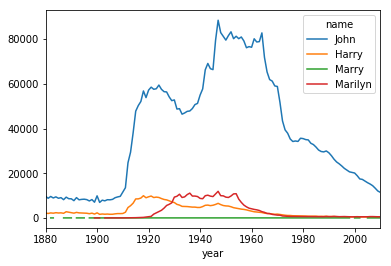

In [27]:
#plt.plot(selected_names) # 이건 label이 출력되지 않음
selected_names.plot() # 이렇게 하면 자동으로 라벨이 생성

## 2010년도에 태어난 boys들만 indexing

In [35]:
total_births.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


In [37]:
total_births.ix[2010, 'M']

1898382

## 아동 이름으로부터 마지막 문자를 취해 저장

In [41]:
names.name.tail()

1690779      Zymaire
1690780       Zyonne
1690781    Zyquarius
1690782        Zyran
1690783        Zzyzx
Name: name, dtype: object

In [42]:
last_words = names.name.map(lambda x : x[-1])
print last_words.head()
print last_words.tail()

0    y
1    a
2    a
3    h
4    e
Name: name, dtype: object
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: name, dtype: object


## row는 마지막 문자, cols는 'sex', 'year'로 pivot_table을 생성

In [43]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [44]:
last_words.head()

0    y
1    a
2    a
3    h
4    e
Name: name, dtype: object

In [56]:
# last_words는 Series이므로, 우선 dataframe으로 바꾸고 merge한다
last_words = pd.DataFrame(last_words)
last_words = last_words.rename(columns = {'name':'last word'})
last_words.head()

,last word
0,y
1,a
2,a
3,h
4,e


In [ ]:
# 40p

In [65]:
# 공통된 컬럼이 없으므로 사용 불가
#pd.merge(names, last_words, how = 'outer')

# 조인도 사용 가능
#names.join(last_words)

# concat는 기본 설정이 axis = 0 (세로로 계산)!!
# concat를 사용해 옆으로 붙이려면 axis = 1을 사용해야함
incl_last_word = pd.concat([names, last_words], axis = 1)
print incl_last_word.head()
incl_last_word.tail()

        name sex  births  year last word
0       Mary   F    7065  1880         y
1       Anna   F    2604  1880         a
2       Emma   F    2003  1880         a
3  Elizabeth   F    1939  1880         h
4     Minnie   F    1746  1880         e


,name,sex,births,year,last word
1690779,Zymaire,M,5,2010,e
1690780,Zyonne,M,5,2010,e
1690781,Zyquarius,M,5,2010,s
1690782,Zyran,M,5,2010,n
1690783,Zzyzx,M,5,2010,x


In [83]:
lw_piv = incl_last_word.pivot_table('births', index = 'last word', columns = ['sex', 'year'],
                          aggfunc = sum)
lw_piv.head()

sex            F                                                          \
year        1880   1881   1882   1883   1884   1885   1886   1887   1888   
last word                                                                  
a          31446  31581  36536  38330  43680  45408  49100  48942  59442   
b            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
c            NaN    NaN      5      5    NaN    NaN    NaN    NaN    NaN   
d            609    607    734    810    916    862   1007   1027   1298   
e          33378  34080  40399  41914  48089  49616  53884  54353  66750   

sex                ...         M                                          \
year        1889   ...      2001    2002    2003    2004    2005    2006   
last word          ...                                                     
a          58631   ...     39124   38815   37825   38650   36838   36156   
b            NaN   ...     50950   49284   48065   45914   43144   42600   
c            NaN   ...     27113   27238   27697   26778   26078   26635   
d           1374   ...     60838   55829   53391   51754   50670   51410   
e          66663   ...    145395  144651  144769  142098  141123  142999   

sex                                        
year         2007    2008    2009    2010  
last word                                  
a           34654   32901   31430   28438  
b           42123   39945   38862   38859  
c           26864   25318   24048   23125  
d           50595   47910   46172   44398  
e          143698  140966  135496  129012  

[5 rows x 262 columns]

## 위의 pivot_table에서 columns를 1910, 1960, 2010년만 취해 reindex하시오

In [72]:
type(incl_last_word['year'])

pandas.core.series.Series

In [71]:
type(incl_last_word[['year']])

pandas.core.frame.DataFrame

In [80]:
incl_last_word[['year']].ix[180]

year    1880
Name: 180, dtype: int64

In [84]:
lw_piv.columns

MultiIndex(levels=[[u'F', u'M'], [1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [87]:
lw_piv1910 = lw_piv.reindex(columns = [1910, 1960, 2010], level = 'year')
lw_piv1910.head()

sex             F                      M                
year         1910    1960    2010   1910    1960    2010
last word                                               
a          108376  691247  670605    977    5204   28438
b             NaN     694     450    411    3912   38859
c               5      49     946    482   15476   23125
d            6750    3729    2607  22111  262112   44398
e          133569  435013  313833  28655  178823  129012

## 위 pivot table의 sex별, year별 합계를 구하시오

In [91]:
lw_piv1910.sum()

sex  year
F    1910     396416
     1960    2022062
     2010    1759010
M    1910     194198
     1960    2132588
     2010    1898382
dtype: float64

## 남녀로 구분하여 가로축은 알파벳, 세로축은 prop로 plotting하시오(2장)

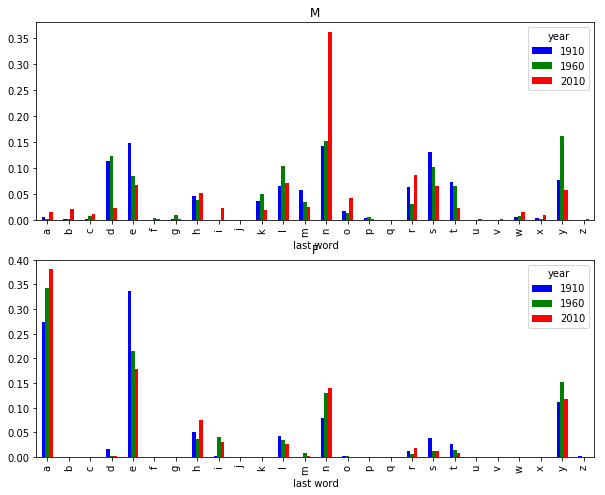

In [108]:
fig, axes = plt.subplots(2, 1, figsize = (10, 8))
(lw_piv1910 / lw_piv1910.sum())['M'].plot(kind = 'bar', ax = axes[0], title = 'M')
(lw_piv1910 / lw_piv1910.sum())['F'].plot(kind = 'bar', ax = axes[1], title = 'F')

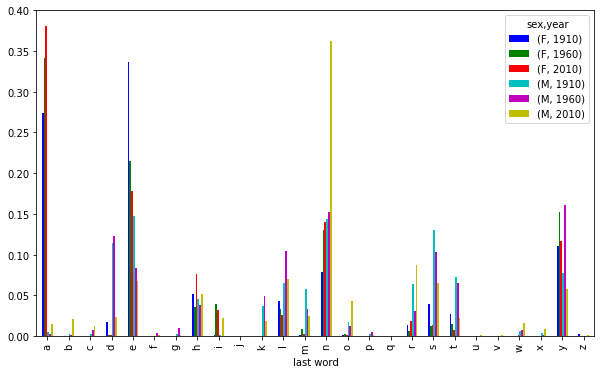

In [111]:
# M, F 같이 출력되어서 보기가 힘듦
(lw_piv1910 / lw_piv1910.sum()).plot(figsize = (10, 6), kind = 'bar')

## 년도별로 d, n, y로 끝나는 이름의 비율을 출력

In [122]:
lw_piv.head()

sex            F                                                          \
year        1880   1881   1882   1883   1884   1885   1886   1887   1888   
last word                                                                  
a          31446  31581  36536  38330  43680  45408  49100  48942  59442   
b            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
c            NaN    NaN      5      5    NaN    NaN    NaN    NaN    NaN   
d            609    607    734    810    916    862   1007   1027   1298   
e          33378  34080  40399  41914  48089  49616  53884  54353  66750   

sex                ...         M                                          \
year        1889   ...      2001    2002    2003    2004    2005    2006   
last word          ...                                                     
a          58631   ...     39124   38815   37825   38650   36838   36156   
b            NaN   ...     50950   49284   48065   45914   43144   42600   
c            NaN   ...     27113   27238   27697   26778   26078   26635   
d           1374   ...     60838   55829   53391   51754   50670   51410   
e          66663   ...    145395  144651  144769  142098  141123  142999   

sex                                        
year         2007    2008    2009    2010  
last word                                  
a           34654   32901   31430   28438  
b           42123   39945   38862   38859  
c           26864   25318   24048   23125  
d           50595   47910   46172   44398  
e          143698  140966  135496  129012  

[5 rows x 262 columns]

In [125]:
lw_dny = (lw_piv / lw_piv.sum()).ix[['d', 'n', 'y'], 'M'].T

print lw_dny.head()
lw_dny.tail()

last word         d         n         y
year                                   
1880       0.083055  0.153213  0.075760
1881       0.083247  0.153214  0.077451
1882       0.085340  0.149560  0.077537
1883       0.084066  0.151646  0.079144
1884       0.086120  0.149915  0.080405


last word,d,n,y
year,,,
2006,0.025075,0.351666,0.060338
2007,0.024451,0.358274,0.059634
2008,0.023574,0.361101,0.060342
2009,0.023398,0.362523,0.057223
2010,0.023387,0.362771,0.058168


# ax = b 매트릭스 방정식 해 구하기

In [126]:
a = pd.DataFrame([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
print a
b = pd.DataFrame([[10], [8], [3]])
print b

np.linalg.inv(a)
np.dot(np.linalg.inv(a), b)

   0  1  2
0  1  3  5
1  2  5  1
2  2  3  8
    0
0  10
1   8
2   3


array([[-9.28],
       [ 5.16],
       [ 0.76]])